# Lab 11 (Module 10)
## Ridge and Lasso Regression 
4/11/2018

### Announcements:
* Reminder: Problem Set due date is April 25th, usual submission rules apply.  Don't save problem 2 until the last minute-- it's hard!
* Midterm grades have been release, and solutions uploaded to bcourses.  A reminder that you must submit a written (word processed) regrade request within 72 hours of grades being released if you wish to have your exam re-graded (see syllabus for further detail) Here is the distribution:

    * Mean, 224.1, 95.4%
    * 10th Percentile, 204.0, 86.8%
    * 25th Percentile, 221.0, 94.0%
    * 50th Percentile, 226.0, 96.2%
    * 75th Percentile, 234.0, 99.6%
    * 90th Percentile, 237.6, 101.1%
    * Min, 179.0, 76.2%
    * Max, 248.0, 105.5%

* Reminder: office hours for the remainder of the semester will be 1pm-3pm Tuesdays in room N455.


### Plan for Today's Lab
1. Introduction/Motivation (5 min)
2. Ridge and Lasso (10 min)
3. Selecting the Tuning Parameter (10 min)
4. An Example in R

## 1- Intro

### Linear Models for Prediction
* Not just for inference-- we can also use regression for prediction!
* Though non-linear may allow for more flexible fitting, linear models have the advantage of being interpretable
* Most basic- use OLS for prediction
* With many variables, we face the bias/variance tradeoff. More variables=less bias=higher variance.  Also too many variables makes interpretation difficult

### Improving on OLS
* Shrinking or constraining the estimated coefficients can allow us to have the best of both worlds
* Large reduction in variance with minimal increase in bias, also makes it easier to interpret because there are fewer relevant coefficients
* Will focus on a method for accomplishing this known as shrinkage-- fit a model with all predictors, but shrink the predictors toward 0 to reduce variance
* Note: Lasso/Ridge good for prediction but not necessary for inference in many cases because we already know a subset of variables we're interested in


## 2-Conceptual Explanation of Ridge and Lasso
### Review of OLS
When you run a regular OLS regression y=ax+b, you are essentially choosing a and b such that the error term known as the *residual sum of squares* is minimized.  (R does this for you-- it involves some Calculus!) The RSS is just the sum of all of the squared differences between actual and predicted values of each observation, or formally:
$RSS=\sum_{i=1}^{n}(y_{i}-\hat{y_{i}})^{2}$
### Ridge
* Ridge and lasso both work by modifying the error term being minimized when running the regression to include a "shrinkage penalty" which is an increasing function of the selected coefficients.  
* The higher the coefficients $\beta_1...\beta_p$ the higher the error term, so when we minimized the error term, this has the effect of shrinking down the coefficients.  For Ridge, we minimize the error term:
$RSS+\lambda\sum_{i=1}^{p}\beta_{j}^{2}$
* $\lambda$ is called the tuning parameter.  A larger tuning parameter leads to higher bias and lower variance.  When $\lambda=0$ the ridge regression is the same as OLS, and as $\lambda$ approaches infinity, the coefficients all approach 0
* we obtain a different set of coefficients for each value of $\lambda$.  * * Note that the shrinkage penalty applies to only the coefficients, and not the intercept $\beta_0$. 
* Ridge regression’s advantage over OLS goes back to the bias-variance tradeoff. With higher $\lambda$, the flexibility of the ridge regression fit decreases, leading to decreased variance but increased bias. 

### Lasso
* Main disadvantage of ridge: coefficients are pushed toward 0, but none are exactly 0, so not necessarily better than OLS from an interpretability standpoint
* Lasso addresses this by shrinking some of the coefs exactly to 0 for high enough value of $\lambda$
* Model is estimated by minimizing $RSS+\lambda\sum_{i=1}^{p}|\beta_{j}|$

Neither ridge nor lasso will universally dominate in terms test dataset error rate.  Lasso tends to do better where a small number of predictors have large coefficients, and ridge may perform better when the outcome is a function of many predictors.

## 3-Selecting the Tuning Parameter $\lambda$
* Important to select the correct value of $\lambda$ to optimize balance fo bias and variance
* We use a procedure calle *K-fold cross validation* to accomplish this
    * Divide the data into K groups (we'll use 10)
    * Iteration 1: Group 1 is test dataset, other k-1 groups are training. Fit training with lasso or ridge using a given value of $\lambda$. Run model on held-out test group and use predicted ($\hat{f}(x_i)$) and actual ($y_i$) outcomes to compute mean squared error:
    $MSE=(1/n)\sum_{i=1}^{n}(y_i-\hat{f}(x_i))^2$
    * Repeat this k times total, with a different group set as the test dataset each time.  Then take the average of the values for MSE, which gives us the cross validation error:
    $CV_{(k)}=(1/k)\sum_{i=1}^{k}MSE_i$
* Repeat this process for a grid of possible values of $\lambda$ each time calculating the cross validation error
* Select $\lambda$ for which CV is the smallest, refit model with all of the available observations and the selection of tuning parameter
* See tuning parameter selection process for ridge with 3 predictors:
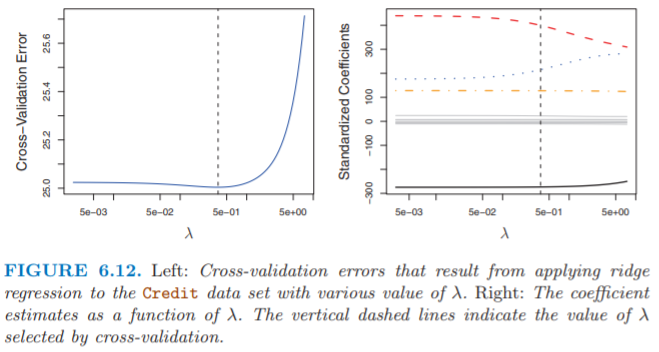

Note: If we want to compare fit across ridge and lasso, we need have a separate held out test dataset for which we can compare the MSE (e.g. cross validation would split the training dataset into k groups)
    
## 4-An Example in R
We will practice an example of lasso and ridge regression reproduced from section 6.6 of ISL, which uses the Hitters Data. This data set is a Major League Baseball Dataset from the 1986 and 1987 seasons. The dataset has with 322 observations of major league players on 20 variables.

We will first read Hitters.csv and use na.omit() to remove data that has missing values.  We also set our predictor variables vector X as all 19 variables in the dataset except y, the outcome variable Salary.

In [1]:
#setwd("/home/jovyan/mba217-2/Data")
#load package for ridge/lasso commands
require(glmnet)
require(stats)
# Read the data and remove observations with missing data
Hitters <- read.csv("../Data/Hitters.csv", header = TRUE)
Hitters <- na.omit(Hitters)
#list variable names
names(Hitters)
#use model.matrix to define predictors
#this function also changes qualitative variables into dummy variables
x=model.matrix(Salary~.,Hitters)[,-1]
head(x, 2)
#set outcome variable 
y=Hitters$Salary

Loading required package: glmnet
Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,LeagueN,DivisionW,PutOuts,Assists,Errors,NewLeagueN
2,315,81,7,24,38,39,14,3449,835,69,321,414,375,1,1,632,43,10,1
3,479,130,18,66,72,76,3,1624,457,63,224,266,263,0,1,880,82,14,0


First fit a ridge regression over a grid of 100 $\lambda$ values between $10^{-2}$ and $10^10$.  glmnet has an alpha arguement-- use alpha=0 for ridge and alpha=1 for lasso.  This will result in a grid of coefficients, with 20 coeffcient estimates for 100 different values of $\lambda$


3 x 3 sparse Matrix of class "dgCMatrix"
   (Intercept)        AtBat         Hits
s0    535.9257 5.443467e-08 1.974589e-07
s1    535.9256 7.195940e-08 2.610289e-07
s2    535.9256 9.512609e-08 3.450649e-07

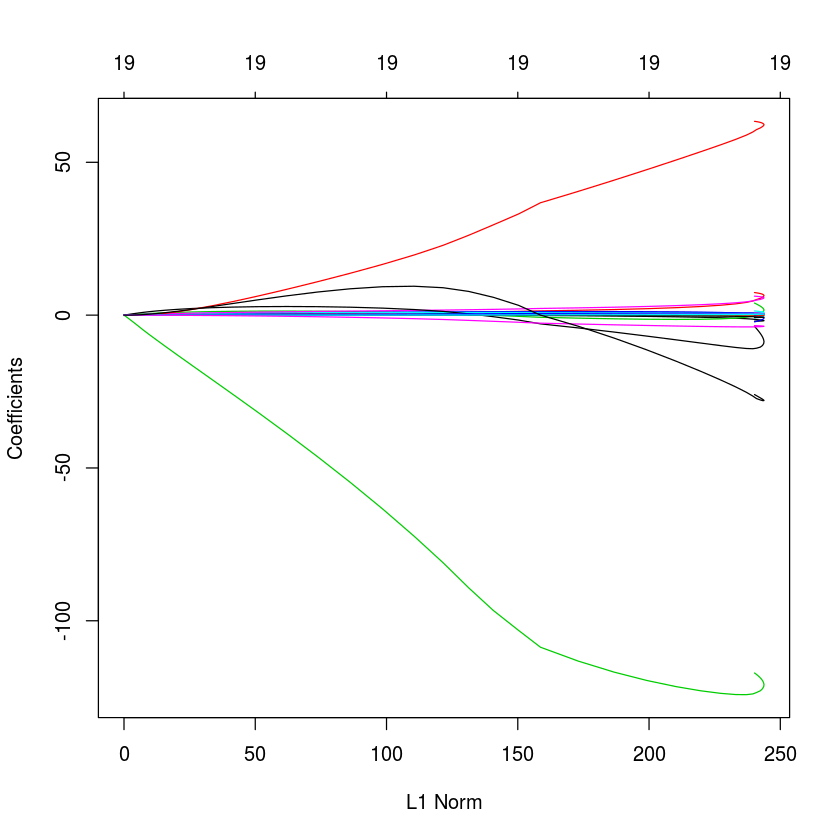

In [12]:
#make grid of lambda values
grid=10^seq(10,-2,length=100)
#run ridge regressions for different lambda
ridge.mod=glmnet(x,y,alpha=0,lambda=grid)
#display intercept and first 2 predictor vars at different lambdas
head(t(coef(ridge.mod)[1:3,]), 3)
plot(ridge.mod)

In [3]:
dim(coef(ridge.mod)) # 20 predictors, 100 lambda

[1]  20 100

In [4]:
str(ridge.mod)

List of 12
 $ a0       : Named num [1:100] 536 536 536 536 536 ...
  ..- attr(*, "names")= chr [1:100] "s0" "s1" "s2" "s3" ...
 $ beta     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. ..@ i       : int [1:1900] 0 1 2 3 4 5 6 7 8 9 ...
  .. ..@ p       : int [1:101] 0 19 38 57 76 95 114 133 152 171 ...
  .. ..@ Dim     : int [1:2] 19 100
  .. ..@ Dimnames:List of 2
  .. .. ..$ : chr [1:19] "AtBat" "Hits" "HmRun" "Runs" ...
  .. .. ..$ : chr [1:100] "s0" "s1" "s2" "s3" ...
  .. ..@ x       : num [1:1900] 5.44e-08 1.97e-07 7.96e-07 3.34e-07 3.53e-07 ...
  .. ..@ factors : list()
 $ df       : int [1:100] 19 19 19 19 19 19 19 19 19 19 ...
 $ dim      : int [1:2] 19 100
 $ lambda   : num [1:100] 1.00e+10 7.56e+09 5.72e+09 4.33e+09 3.27e+09 ...
 $ dev.ratio: num [1:100] 2.76e-07 3.64e-07 4.82e-07 6.37e-07 8.42e-07 ...
 $ nulldev  : num 53319113
 $ npasses  : int 2130
 $ jerr     : int 0
 $ offset   : logi FALSE
 $ call     : language glmnet(x = x, y = y, alpha = 0, lambda =

In [5]:
ridge.mod$lambda[50]
coef(ridge.mod)[,50]
sqrt(sum(coef(ridge.mod)[-1,50]^2))

[1] 11497.57

(Intercept)         AtBat          Hits         HmRun          Runs 
407.356050200   0.036957182   0.138180344   0.524629976   0.230701523 
          RBI         Walks         Years        CAtBat         CHits 
  0.239841459   0.289618741   1.107702929   0.003131815   0.011653637 
       CHmRun         CRuns          CRBI        CWalks       LeagueN 
  0.087545670   0.023379882   0.024138320   0.025015421   0.085028114 
    DivisionW       PutOuts       Assists        Errors    NewLeagueN 
 -6.215440973   0.016482577   0.002612988  -0.020502690   0.301433531

[1] 6.360612

We now split the samples into a training set and a test set in order to estimate the test error of ridge regression and the lasso. We randomly choose a subset of numbers between 1 and n; these can then be used as the indices for the training observations. We first set a random seed so that the results obtained will be reproducible.

In [6]:
#set seed
set.seed(1)
#assign training sample
train=sample(1:nrow(x), nrow(x)/2)
#assign leftover to test sample
test=(-train)
#set testing outcome
y.test=y[test]

Next we want to fit a ridge regression model on the training set.  Instead of arbitrarily choosing a value for $\lambda$, we can use cross-validation to choose the optimal tuning parameter λ . We can do this using the built-in cross-validation function, cv.glmnet() . By default, the function cv.glmnet() performs ten-fold cross-validation, though this can be changed using the argument nfolds. Note that we set a random seed first so our results will be reproducible, since the choice of the cross-validation folds is random.  You need to reset the seed each time you do a random sampling procedure.

[1] 211.7416

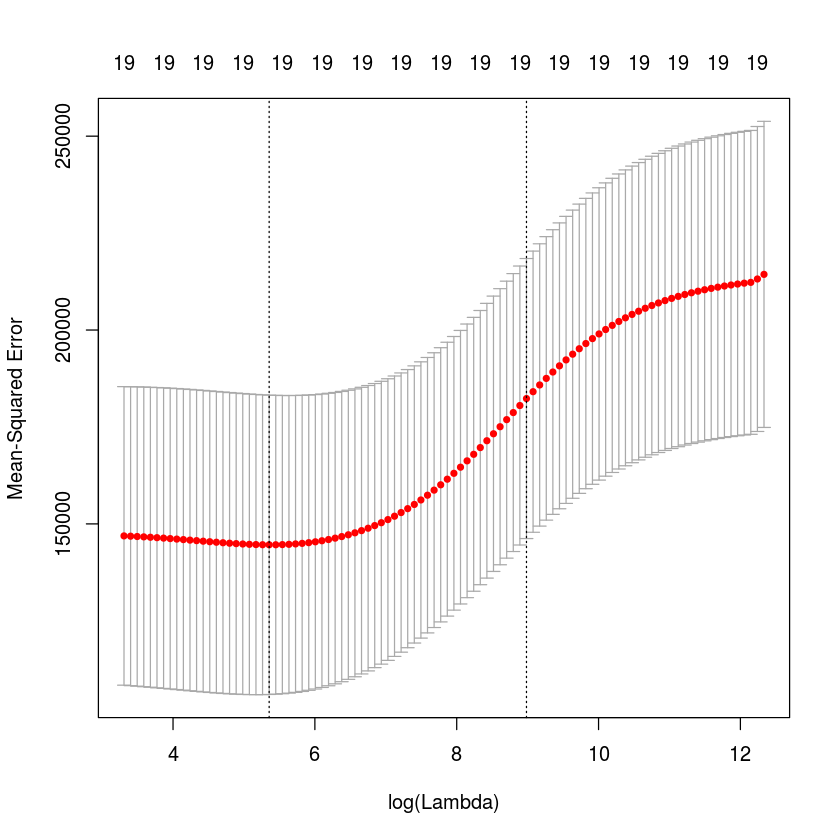

In [17]:
set.seed(1)
cv.out=cv.glmnet(x[train ,],y[train],alpha =0)
plot(cv.out)
bestlam=cv.out$lambda.min
bestlam


In [23]:
log(cv.out$lambda.min)

[1] 5.355367

In [19]:
str(cv.out)

List of 10
 $ lambda    : num [1:98] 227044 206874 188496 171750 156492 ...
 $ cvm       : num [1:98] 214354 213165 212292 212086 211861 ...
 $ cvsd      : num [1:98] 39474 39329 39183 39159 39133 ...
 $ cvup      : num [1:98] 253828 252494 251475 251245 250994 ...
 $ cvlo      : num [1:98] 174881 173836 173109 172927 172728 ...
 $ nzero     : Named int [1:98] 19 19 19 19 19 19 19 19 19 19 ...
  ..- attr(*, "names")= chr [1:98] "s0" "s1" "s2" "s3" ...
 $ name      : Named chr "Mean-Squared Error"
  ..- attr(*, "names")= chr "mse"
 $ glmnet.fit:List of 12
  ..$ a0       : Named num [1:100] 548 539 539 538 537 ...
  .. ..- attr(*, "names")= chr [1:100] "s0" "s1" "s2" "s3" ...
  ..$ beta     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:1900] 0 1 2 3 4 5 6 7 8 9 ...
  .. .. ..@ p       : int [1:101] 0 19 38 57 76 95 114 133 152 171 ...
  .. .. ..@ Dim     : int [1:2] 19 100
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : chr [1:19] "AtBat" "Hits" "

Therefore, we see that the value of $\lambda$ that results in the smallest cross validation error is 212. We then find the the test MSE associated with this value of $\lambda$, which will allow us to later compare the overall fit to a lasso model.

Finally, we refit our ridge regression model on the full data set, using the value of λ chosen by cross-validation, and examine the coefficient estimates. As expected, none of the coefficients are zero—ridge regression does not perform variable selection!

In [8]:
#run ridge with selected lambda on test set
ridge.pred=predict(ridge.mod,s=bestlam,newx=x[test ,])
#calculate mse
mean((ridge.pred-y.test)^2)

# on train to prove that the y, x model is based on training dataset
mean(predict(ridge.mod,s=bestlam,newx=x[train,]) == y[train])

#fit to full dataset with chosen lambda, examine coefficients
out=glmnet(x,y,alpha=0)
predict(out,type="coefficients",s=bestlam )[1:20 ,]


[1] 80280.46

[1] 0

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  9.88487157   0.03143991   1.00882875   0.13927624   1.11320781   0.87318990 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
  1.80410229   0.13074383   0.01113978   0.06489843   0.45158546   0.12900049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
  0.13737712   0.02908572  27.18227527 -91.63411282   0.19149252   0.04254536 
      Errors   NewLeagueN 
 -1.81244470   7.21208394

We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. In order to fit a lasso model, we once again use the glmnet() function; however, this time we use the argument alpha=1 .Other than that change, we proceed just as we did in fitting a ridge model. We can see from the coefficient plot that depending on the choice of tuning parameter, some of the coefficients will be exactly equal to zero. 

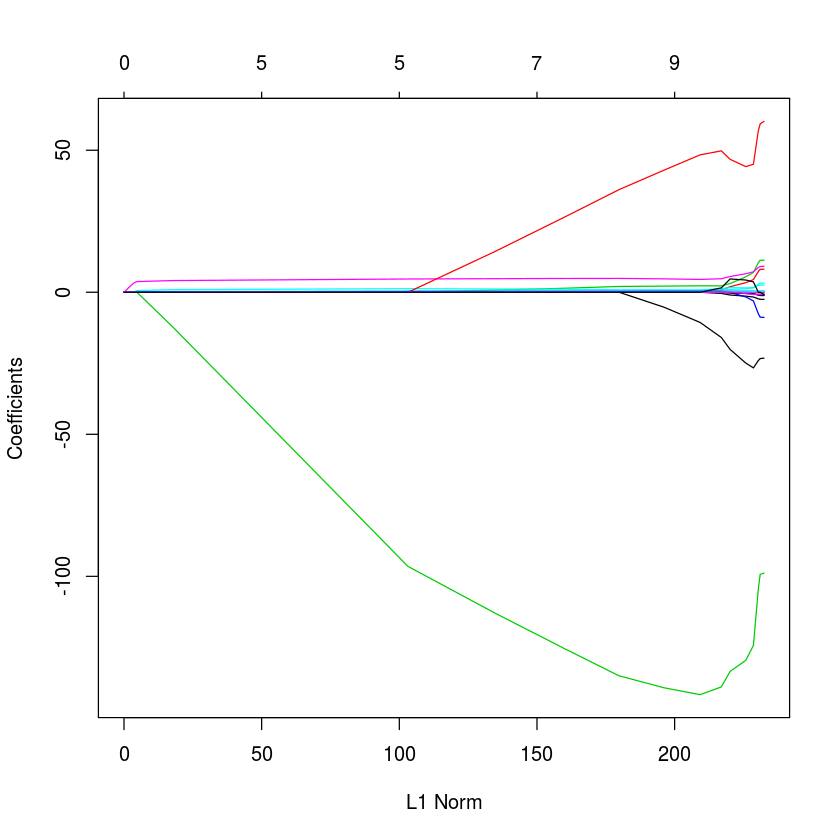

In [9]:
#lasso over grid of lambdas
lasso.mod=glmnet(x[train ,],y[train],alpha =1, lambda =grid)
#plot coefficient values at different lambdas
plot(lasso.mod)


We now perform cross-validation and compute the associated test error. How does it compare to the test MSE of ridge regression with $\lambda$ chosen by cross-validation?  

[1] 100743.4

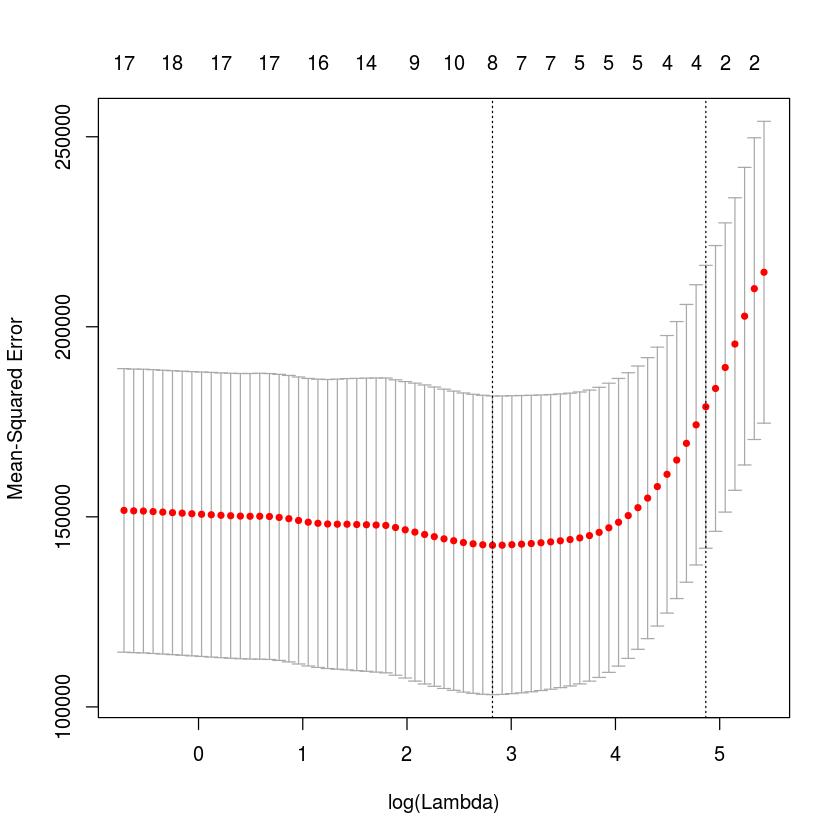

In [10]:
#set seed for reproducible randomization
set.seed(1)
#cross validation to select lambda
cv.out=cv.glmnet(x[train ,],y[train],alpha =1)
#plot CV error for different lambda
plot(cv.out)
#select optimal lambda with smallest CV error
bestlam=cv.out$lambda.min
#run model with optimal lambda on test data
lasso.pred=predict(lasso.mod,s=bestlam,newx=x[test ,])
#calculate MSE for comparison with ridge
mean((lasso.pred-y.test)^2)

Next, we run the model on the full dataset and compute the coefficients.  What do you notice?  Do you think ridge or lasso is a better model in this case?

In [11]:
#run lasso model with optimal lambda on full dataset
out=glmnet(x,y,alpha=1,lambda=grid)
lasso.coef=predict(out,type="coefficients",s=bestlam )[1:20 ,]
#display coefficients
lasso.coef

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
  18.5394844    0.0000000    1.8735390    0.0000000    0.0000000    0.0000000 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   2.2178444    0.0000000    0.0000000    0.0000000    0.0000000    0.2071252 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.4130132    0.0000000    3.2666677 -103.4845458    0.2204284    0.0000000 
      Errors   NewLeagueN 
   0.0000000    0.0000000